# Prediction of Coronavirus Cases in India

The number of people infected by an infectious disease such as Covid-19 tends to display exponential growth over time. This is because the spread of the disease (or the rate of change) is directly proportional to the number of people infected, which is characteristic of exponential phenomena. 

However, since the population of the world is finite, the behaviour is more accurately depicted with a logistic curve as the number of people infected would saturate around some fraction of the total population. Nevertheless, in the early stages (such as in India), the curve of Total Cases vs Time can be approximated as an exponential curve.

If our hypothesis is true, the logarithmic curve of this data should be close to a straight line. This has been used to create a simple linear regression model which selects the line with the best fit and uses it to predict future data. Each day when new data is obtained, the model is adjusted so that it is better able to predict the number of cases the day after.

**Data Collection and Cleaning**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
date_list = ['Mar 01', 'Mar 02', 'Mar 03', 'Mar 04', 'Mar 05', 'Mar 06', 'Mar 07', 'Mar 08', 'Mar 09', 
             'Mar 10', 'Mar 11', 'Mar 12', 'Mar 13', 'Mar 14', 'Mar 15', 'Mar 16', 'Mar 17', 'Mar 18',
             'Mar 19', 'Mar 20', 'Mar 21', 'Mar 22', 'Mar 23', 'Mar 24', 'Mar 25', 'Mar 26', 'Mar 27',
             'Mar 28', 'Mar 29', 'Mar 30', 'Mar 31', 'Apr 01', 'Apr 02', 'Apr 03', 'Apr 04', 'Apr 05',
             'Apr 06', 'Apr 07']
case_list = [3,6,7,29,30,31,34,40,47,62,62,74,82,100,114,129,143,169,194,249,332,396,499,536,657,727,
             887,987,1024,1251,1397,1998,2543,3059,3588,4289,4778, 5351]

Source: https://www.worldometers.info/coronavirus/country/india/

In [4]:
df = pd.DataFrame(data=np.transpose(np.array([np.arange(1, 39),case_list])), index=date_list, columns=['Days', 'Cases'])
df.index.name='Date'
df

,Days,Cases
Date,,
Mar 01,1,3
Mar 02,2,6
Mar 03,3,7
Mar 04,4,29
Mar 05,5,30
Mar 06,6,31
Mar 07,7,34
Mar 08,8,40
Mar 09,9,47


Applying log function to number of cases,

In [5]:
df['log(Cases)'] = df['Cases'].apply(np.log10)
df

,Days,Cases,log(Cases)
Date,,,
Mar 01,1,3,0.477121
Mar 02,2,6,0.778151
Mar 03,3,7,0.845098
Mar 04,4,29,1.462398
Mar 05,5,30,1.477121
Mar 06,6,31,1.491362
Mar 07,7,34,1.531479
Mar 08,8,40,1.602060
Mar 09,9,47,1.672098


We can visualize the data in the following graph.

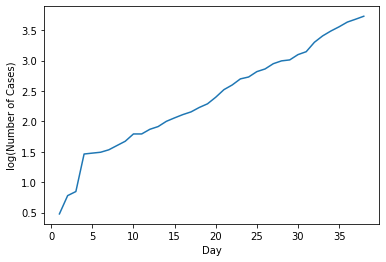

In [6]:
plt.plot(df['Days'], df['log(Cases)'])
plt.xlabel('Day')
plt.ylabel('log(Number of Cases)')
plt.show()

Since the number of cases for the first few days is very small, there is large fluctuation in the early part of the graph, after which it stabilizes to a nearly straight line. Hence, we choose to ignore the data of the first 5 days in order to develop a linear model with a better fit.

In [7]:
model_df = df[df['Days']>5]
X = model_df[['Days']]
y = model_df['log(Cases)']

**Linear Regression**

In [8]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

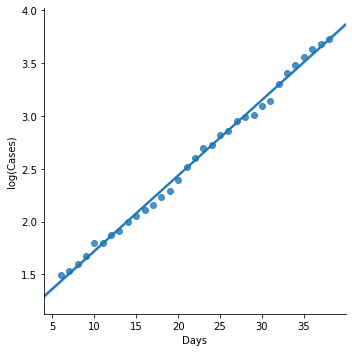

In [9]:
sns.lmplot(x='Days', y='log(Cases)', data=model_df)

Using this model we can predict the number of cases in the future. In particular, each day we predict 4 values - the number of expected cases next day, after day 40, after day 50 and after day 60.

In [11]:
pred = lm.predict(pd.DataFrame([39, 40, 50, 60]))
print(np.round(10**pred))

[  6240.   7357.  38205. 198394.]


Finally, we store all these values in a data frame which is updated daily, along with the % error in that day's prediction.

In [12]:
daily_upd = pd.DataFrame(index=['Next Day', 'Day 40', 'Day 50', 'Day 60', '% Error'], data=[2129, 6519, 32243, 159469, '-'], columns=['Apr 01'])
daily_upd['Apr 02'] = [2563, 6740, 33773, 169241, -16.28]
daily_upd['Apr 03'] = [3085, 6949, 35248, 178802, -16.21]
daily_upd['Apr 04'] = [3703, 7118, 36459, 186753, -14.02]
daily_upd['Apr 05'] = [4444, 7273, 37588, 194258, -13.66]
daily_upd['Apr 06'] = [5284, 7346, 38119, 197815, -6.99]
daily_upd['Apr 07'] = [6240, 7357, 38205, 198394, -1.25]
daily_upd = daily_upd.transpose()
daily_upd

,Next Day,Day 40,Day 50,Day 60,% Error
Apr 01,2129,6519,32243,159469,-
Apr 02,2563,6740,33773,169241,-16.28
Apr 03,3085,6949,35248,178802,-16.21
Apr 04,3703,7118,36459,186753,-14.02
Apr 05,4444,7273,37588,194258,-13.66
Apr 06,5284,7346,38119,197815,-6.99
Apr 07,6240,7357,38205,198394,-1.25


**Observations and Comments**

1. A small variation in % error is expected due to social factors which may either speed up (mass gatherings) or slow down (lockdown) the spread of the virus on any given day.

2. Despite the fluctuation, the daily % error is expected to gradually decrease as more data is collected.

3. The expected number of cases on day:-

a) 40 should be lower than the value predicted due to the imposed lockdown.

b) 50 should be higher than the value predicted if the lockdown is lifted.

c) 60 should be lower than the value predicted as the curve is likely to start following logistic behaviour. 